In [260]:
############################################################################### Etude Cas:Analyse et prédiction des Ventes ###########################################################################
#Auteur: BIAO AFOLABY ELRICK SULLIVAN
#Elrick731@gmail.com
#781174533
############################################################################################################################################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
import os as sys
########################################################################################################################################################
test=pd.read_csv('/content/drive/MyDrive/test.csv')
train=pd.read_csv('/content/drive/MyDrive/train.csv')
pd.concat([test,train])





,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Sales,Customers
0,1.0,1,4,2015-09-17,1.0,1.0,0,0.0,NaN,NaN
1,2.0,3,4,2015-09-17,1.0,1.0,0,0.0,NaN,NaN
2,3.0,7,4,2015-09-17,1.0,1.0,0,0.0,NaN,NaN
3,4.0,8,4,2015-09-17,1.0,1.0,0,0.0,NaN,NaN
4,5.0,9,4,2015-09-17,1.0,1.0,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
112099,NaN,600,3,2015-04-22,1.0,0.0,0,0.0,5246.0,504.0
112100,NaN,601,3,2015-04-22,1.0,0.0,0,0.0,3615.0,303.0
112101,NaN,602,3,2015-04-22,1.0,0.0,0,0.0,5174.0,547.0
112102,NaN,603,3,2015-04-22,1.0,0.0,0,0.0,5479.0,937.0


In [5]:
############################################################################################################################################################################################

############################################################   Data Analyse And Data Mining ###############################################################################
# Nous allons analyser nos données,les explorer en profondeur , et les rendre plus utilisables avant de les faire passer dans nos modèles de deep et Machine learning

In [6]:
############################################################################################################################################################################################
#Les ventes(Notre target) sont estimés en $
train["Sales"].value_counts().unique()

array([15235,  4111,    32,    31,    29,    28,    27,    26,    25,
          24,    23,    22,    21,    20,    19,    18,    17,    16,
          15,    14,    13,    12,    11,    10,     9,     8,     7,
           6,     5,     4,     3,     2,     1])

In [7]:
train.dtypes.value_counts()
#Nous avons 7 variables continues et 2 variables catégorielles

float64    5
int64      2
object     2
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112104 entries, 0 to 112103
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          112104 non-null  int64  
 1   DayOfWeek      112104 non-null  int64  
 2   Date           112104 non-null  object 
 3   Sales          112103 non-null  float64
 4   Customers      112103 non-null  float64
 5   Open           112103 non-null  float64
 6   Promo          112103 non-null  float64
 7   StateHoliday   112103 non-null  object 
 8   SchoolHoliday  112103 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 7.7+ MB


In [9]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0
1,2,5,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0
2,3,5,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0
3,4,5,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0
4,5,5,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0
...,...,...,...,...,...,...,...,...,...
112099,600,3,2015-04-22,5246.0,504.0,1.0,0.0,0,0.0
112100,601,3,2015-04-22,3615.0,303.0,1.0,0.0,0,0.0
112101,602,3,2015-04-22,5174.0,547.0,1.0,0.0,0,0.0
112102,603,3,2015-04-22,5479.0,937.0,1.0,0.0,0,0.0


In [10]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [11]:
#Nous avllons prendre connaissance des Statisques générales et de la position de donneés par rapport au centre de nos données (eccart quadratique ou variance)

print("Stat générales:",train.describe(),"Ecart quadratique:",train.var())

Stat générales:                Store      DayOfWeek  ...          Promo  SchoolHoliday
count  112104.000000  112104.000000  ...  112103.000000  112103.000000
mean      536.138389       3.914437  ...       0.417741       0.184402
std       332.654150       2.034087  ...       0.493189       0.387813
min         1.000000       1.000000  ...       0.000000       0.000000
25%       246.000000       2.000000  ...       0.000000       0.000000
50%       534.000000       4.000000  ...       0.000000       0.000000
75%       824.000000       6.000000  ...       1.000000       0.000000
max      1115.000000       7.000000  ...       1.000000       1.000000

[8 rows x 7 columns] Ecart quadratique: Store            1.106588e+05
DayOfWeek        4.137510e+00
Sales            1.531627e+07
Customers        2.100335e+05
Open             1.174271e-01
Promo            2.432356e-01
SchoolHoliday    1.503991e-01
dtype: float64


In [12]:
train.isna().mean()

Store            0.000000
DayOfWeek        0.000000
Date             0.000000
Sales            0.000009
Customers        0.000009
Open             0.000009
Promo            0.000009
StateHoliday     0.000009
SchoolHoliday    0.000009
dtype: float64

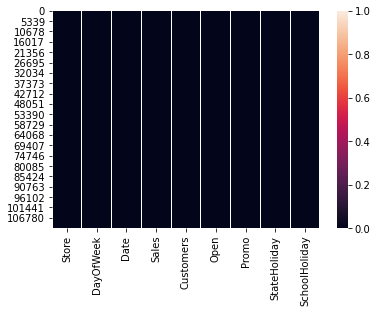

In [ ]:
sb.heatmap(train.isna())
#Nous avons très peu de valeurs manquantes

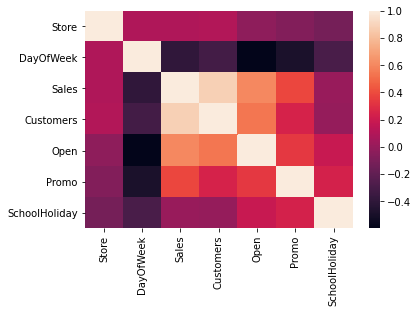

In [13]:
#Matrice de correlation

sb.heatmap(train.corr())
#Nous constatons que les variables correlés sont: Sales, Open , Promo , Customers nous allons analyser ces relations inter-variables plus en detail

In [16]:
train.Date=pd.to_datetime(train["Date"],errors="coerce")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


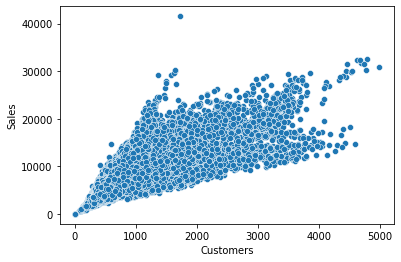

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


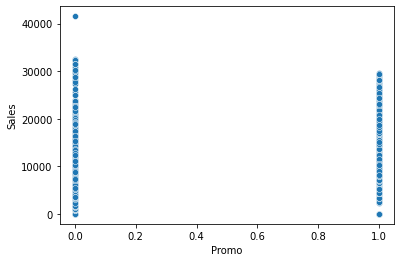

In [17]:
sb.scatterplot(train["Customers"],train["Sales"])
plt.show()
sb.scatterplot(train["Promo"],train["Sales"])
 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


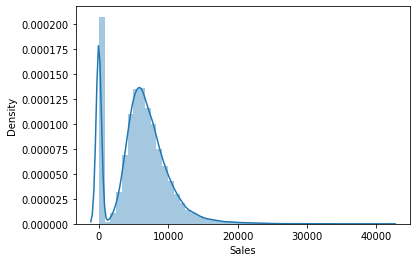

In [18]:

#visualisosns la distribution de notre variable dépendante
features=train.columns
sb.distplot(train["Sales"])
#Nous avons une distribution presque  normale|Gaussienne

In [ ]:
pd.crosstab(train["Sales"],train["Open"])
# On peut déduire que lorsque le magagsin est fermé on a majoritairemet un CA nul ce qui est logique
# Il y a un seul cas dans lequel le magasin est ouvert sans de vente
#Généralement lorsque le magasin est ouvert on a un CA !=0 ce qui est  assez logique


Open,0.0,1.0
Sales,,
0.0,15234,1
1.0,0,4111
569.0,0,1
702.0,0,1
703.0,0,1
...,...,...
31665.0,0,1
32271.0,0,1
32400.0,0,1


In [ ]:
pd.crosstab(train["Sales"],train["DayOfWeek"])
#les dimanches est le jour ou il y a le souvent un chiffre d'affaire nul
#Hypothese: Il se peut que le magasin soit fermé les dimanches..



DayOfWeek,1,2,3,4,5,6,7
Sales,,,,,,,
0.0,11,13,13,16,13,10,15159
1.0,4111,0,0,0,0,0,0
569.0,0,0,0,0,0,1,0
702.0,0,0,0,0,0,1,0
703.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
31665.0,0,0,0,0,0,0,1
32271.0,0,0,0,0,0,0,1
32400.0,0,0,0,0,0,0,1


In [ ]:
pd.crosstab(train["Customers"],train["Open"])
## On peut déduire que lorsque le magagsin est fermé on n'a pas de client ce qui est logique

#Généralement lorsque le magasin est ouvert on a des clients ce qui est assez logique

Open,0.0,1.0
Customers,,
0.0,15234,1
1.0,0,4111
75.0,0,1
82.0,0,1
87.0,0,1
...,...,...
4691.0,0,1
4729.0,0,1
4762.0,0,1


In [ ]:
pd.crosstab(train["Sales"],train["Customers"])
#Quand il n'y a pas de client il n'y a pas de chiffre d'affaire généralement
#Dès quil y a des clients il a un chiffre d'affaire non nul dans la journée en question
#C'est assez logique

Customers,0.0,1.0,75.0,82.0,87.0,92.0,100.0,101.0,103.0,104.0,105.0,112.0,114.0,117.0,118.0,119.0,121.0,122.0,123.0,125.0,126.0,127.0,128.0,131.0,132.0,133.0,134.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,...,3954.0,3968.0,3978.0,4013.0,4023.0,4050.0,4051.0,4054.0,4075.0,4077.0,4084.0,4094.0,4121.0,4136.0,4160.0,4170.0,4180.0,4256.0,4300.0,4335.0,4340.0,4360.0,4382.0,4394.0,4397.0,4424.0,4448.0,4450.0,4453.0,4510.0,4531.0,4533.0,4582.0,4623.0,4668.0,4691.0,4729.0,4762.0,4783.0,4985.0
Sales,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,15235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.0,0,4111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
569.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
702.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
703.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31665.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32271.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
32400.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
pd.crosstab(train["Sales"]==0,train["Customers"]>0)
#Il n'existe pas de cas ou on n'a pas de chiffre d'affaire >0 dans une journée quand on a des clients

Customers,False,True
Sales,,
False,1,261276
True,46942,0


In [ ]:
pd.crosstab(train["Sales"],train["Promo"])

#On peut en déduire que qu'il y ai promo ou pas on peut ne pas avoir de chiffre d'affaire
#Analysons plus en détail 


Promo,0.0,1.0
Sales,,
0.0,45726,1216
1.0,0,6140
46.0,1,0
124.0,1,0
530.0,1,0
...,...,...
33984.0,1,0
36417.0,1,0
37122.0,1,0


In [ ]:
pd.crosstab(train["Sales"]>0,train["Promo"]==0)
#On peut en déduire que lorsqu'il n'y a pas de promos on a plus de cas dans lequel on a un chiffre d'affaire >0 / au cas ou il y une promo
#Ca à l'air absurde mais il y a certains facteurs qui entrent en jeu comme par exemple:
#Est-ce qu'un client qui a un besoin attendra une promotion avant d'acheter un article?

Promo,False,True
Sales,,
False,1217,45726
True,125559,135717


In [36]:
#Fonctions de data Mining
def missing_split(data):
    for i in data.select_dtypes("object"):
      data.loc[i]=data[i].apply(lambda x:int(len(str(x))))
    for i in data.columns:
      data[i]=data[i].apply(lambda x:0 if pd.isna(x) else x)
      data["Date"]=data[i].apply(lambda x:len(str(x)))
      xtrain=data.drop("Sales",axis=1)
      ytrain=data["Sales"]
    train[train["StateHoliday"]=="b"]=2
    train[train["StateHoliday"]=="c"]=3
    train[train["StateHoliday"]=="a"]=1
    return xtrain,ytrain
 
def split(data):
  xtrain=data.drop("Sales",axis=1)
  ytrain=data["Sales"]
  return xtrain,ytrain
def reduce_variance(data):
  sc= StandardScaler()
  data=sc.fit_transform(data)
  return data

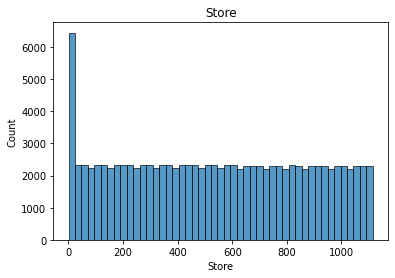

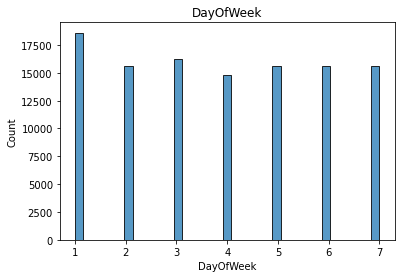

In [ ]:
#Data vizualisation de nos variables
# Variables continues
for i in train.select_dtypes("int"):
  plt.figure()
  sb.histplot(train[i])
  plt.title(i)




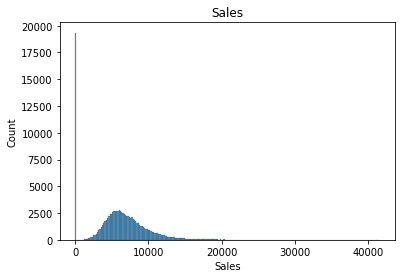

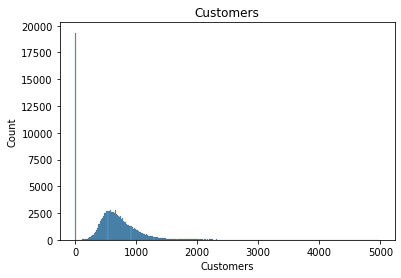

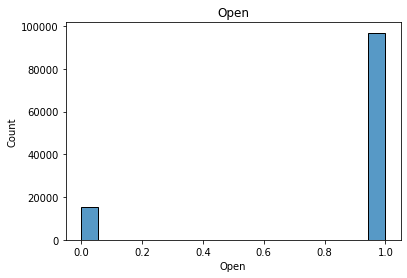

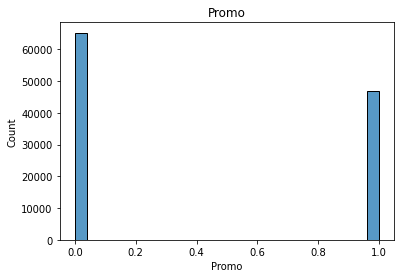

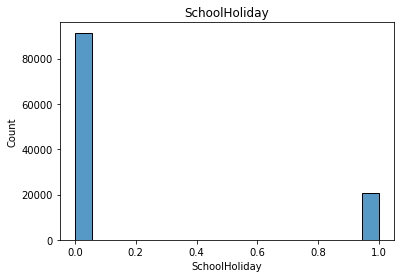

In [ ]:
# Variables de type float
for i in train.select_dtypes("float"):
  plt.figure()
  sb.histplot(train[i])
  plt.title(i)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


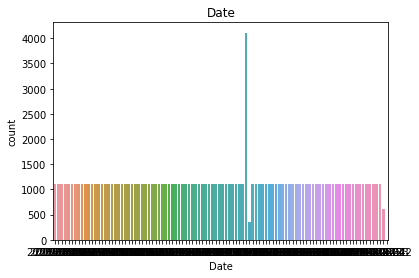

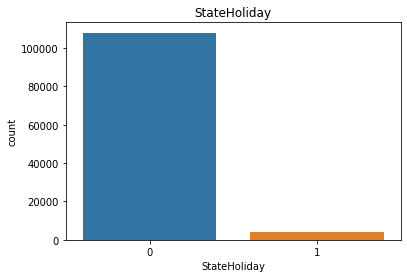

In [ ]:
# Variables discretes
for i in train.select_dtypes("object"):
  plt.figure()
  sb.countplot(train[i])
  plt.title(i)

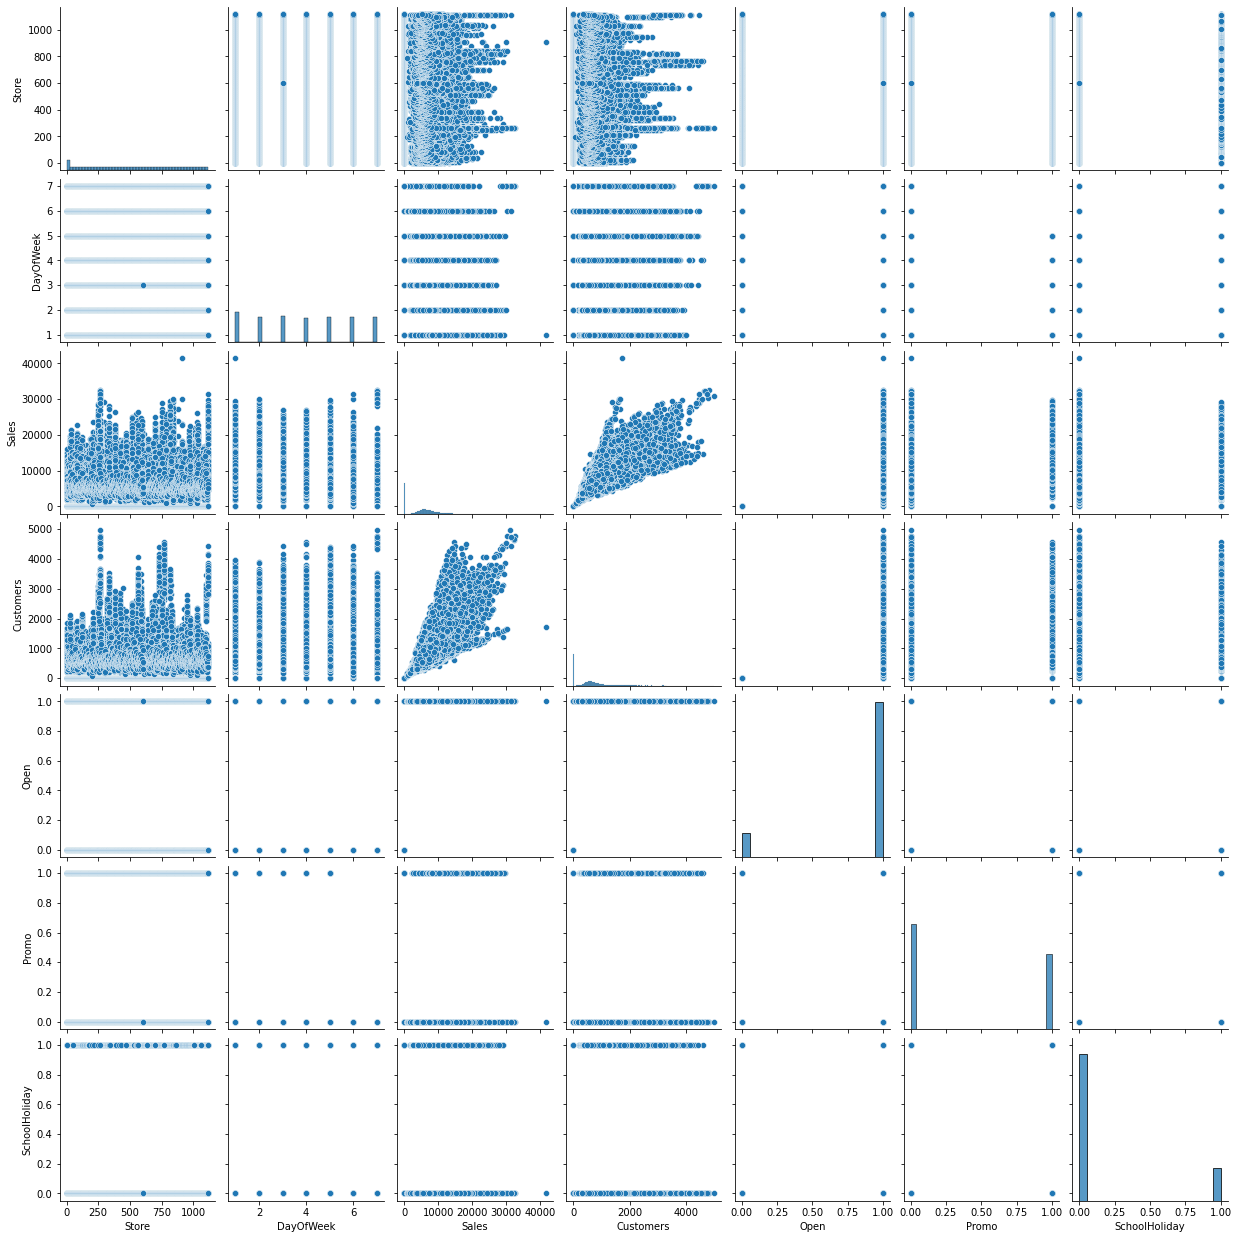

In [19]:
#
sb.pairplot(train)

In [22]:

xtrain,ytrain=missing_split(train)
print(xtrain.shape,ytrain.shape)




(112105, 8) (112105,)


In [24]:
#Nous allons forcer nos variables à avoir une distribution proche d'une distribution normale en utilisant la loi normale standard 
#
xtrain=reduce_variance(xtrain)
xtrain.shape

(112105, 8)

In [25]:
 ##################################################################################################################################################################################
 #Deux approches:
 #-DL
 #-ML

In [ ]:
################################################################## Prediction avec  Deep Learning  ##################################################################################""

In [26]:
#Simple reseau de neurones à 4 couches et noeuds




In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import  activations
from tensorflow.keras import metrics

In [28]:
modele=Sequential()


In [29]:
#couche d'entrée
#La fonction d'activatrion utilisé est une fonction Linéaire
modele.add(Dense(units=6,kernel_initializer="uniform",activation="linear",input_shape=(8,)))
#Couche cachée
modele.add(Dense(units=6,kernel_initializer="uniform",activation="linear"))
modele.add(Dense(units=6,kernel_initializer="uniform",activation="linear"))
#couche de sortie
modele.add(Dense(units=1,kernel_initializer="uniform",activation="linear"))



In [30]:
#Nous sommes en face d'un problème de régression on utilisera la somme du carré des résidus et la minimiser
modele.compile(optimizer="adam",loss="mse",metrics=["mse"])

In [31]:
#Un rsumé de notre réseau avec les couches et les noeuds
modele.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 54        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [32]:
modele.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
3504/3504 [==============================] - 4s 1ms/step - loss: 29250285.4685 - mse: 29250285.4685
Epoch 2/100
3504/3504 [==============================] - 4s 1ms/step - loss: 2313093.2595 - mse: 2313093.2595
Epoch 3/100
3504/3504 [==============================] - 4s 1ms/step - loss: 2333686.2039 - mse: 2333686.2039
Epoch 4/100
3504/3504 [==============================] - 4s 1ms/step - loss: 2310717.6687 - mse: 2310717.6687
Epoch 5/100
3504/3504 [==============================] - 4s 1ms/step - loss: 2314944.3544 - mse: 2314944.3544
Epoch 6/100
3504/3504 [==============================] - 4s 1ms/step - loss: 2352589.3739 - mse: 2352589.3739
Epoch 7/100
3504/3504 [==============================] - 4s 1ms/step - loss: 2347744.9607 - mse: 2347744.9607
Epoch 8/100
3504/3504 [==============================] - 4s 1ms/step - loss: 2315026.1002 - mse: 2315026.1002
Epoch 9/100
3504/3504 [==============================] - 4s 1ms/step - loss: 2313718.1728 - mse: 2313718.1728
Epoch 10

In [37]:
for i in test.columns:
  test[i]=test[i].apply(lambda x:0 if pd.isna(x) else x)
for i in test.select_dtypes("object"):
  test[i]=test[i].apply(lambda x:int(len(str(x))))

In [38]:
test=sc.fit_transform(test)

In [39]:
test=reduce_variance(test)

In [41]:
ypredict=modele.predict(test)

In [42]:
ypredict

array([[7621.195 ],
       [7619.971 ],
       [7617.5327],
       ...,
       [5214.1685],
       [5213.553 ],
       [5248.1177]], dtype=float32)

In [252]:
modele.evaluate(xtrain,ytrain)
modele.evaluate(test,ypredict)

1284/1284 [==============================] - 2s 1ms/step - loss: 9.6869e-08 - mse: 9.6869e-08


[9.686915092288473e-08, 9.686915092288473e-08]

In [261]:
y=[]
copy=test.copy()


In [262]:
for i in ypredict:
  for j in i:
    y.append(j)


In [264]:
copy["Sales"]=y


In [265]:

kagg=pd.DataFrame(copy[["Id","Sales"]])

In [266]:
 kagg.to_csv("res1.csv",index=False)

In [ ]:
 ########################################################################## Prediction  avec du Machine learning #########################################################################

In [243]:
kagg

,Id,Sales
0,1,7621.194824
1,2,7619.971191
2,3,7617.532715
3,4,7616.917969
4,5,7616.303223
...,...,...
41083,41084,5215.398438
41084,41085,5214.782715
41085,41086,5214.168457
41086,41087,5213.553223


In [244]:
kaggle

,Id,Sales
0,1,7621.194824
1,2,7619.971191
2,3,7617.532715
3,4,7616.917969
4,5,7616.303223
...,...,...
41083,41084,5215.398438
41084,41085,5214.782715
41085,41086,5214.168457
41086,41087,5213.553223


In [114]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
LinearRegression=LinearRegression()
from sklearn.linear_model import Lasso
Lasso=Lasso()
from sklearn.linear_model import BayesianRidge
BayesianRidge=BayesianRidge()
from sklearn.linear_model import Ridge
Ridge=Ridge()
from sklearn.svm import  LinearSVR
LinearSVR=LinearSVR()

algo_ml={"LinearRegression":LinearRegression,"LinearSVR":LinearSVR,"Lasso":Lasso,"BayesianRidge":BayesianRidge,"Ridger":Ridge}
for i in algo_ml.values():
  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.8482625803271933
LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)
0.8439218873024286
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
0.8482621627534493
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
0.8482625801683776
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
0.8482625802810377


In [134]:
from sklearn.model_selection import learning_curve
def learn_predict_validation(algo_ml):
  for i in algo_ml.values():
    print(i)
    print(i.score(xtrain,ytrain))
    y=i.predict(test)
    print(y)
    gamma,train_score,val_score=learning_curve(i,xtrain,ytrain,cv=5,scoring="neg_root_mean_squared_error")
    plt.figure()
    plt.plot(gamma,train_score.mean(axis=1))
    plt.plot(gamma,val_score.mean(axis=1))
    
   
    return 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.8482625803271933
[7536.63267903 7535.36958374 7532.8481328  ... 5216.83064269 5216.19672522
 5210.383628  ]
Courbe d'apprentissage de  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)
0.8439218873024286
[7048.95666269 7047.94745654 7045.92904541 ... 5188.98103161 5188.47642795
 5181.1329192 ]
Courbe d'apprentissage de  LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_star

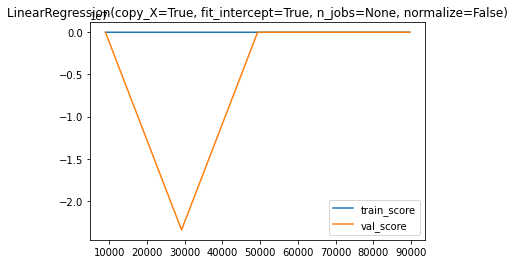

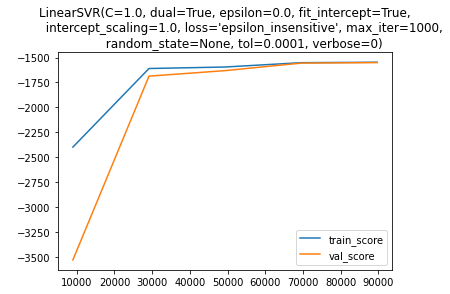

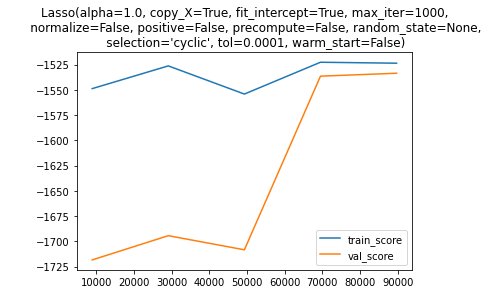

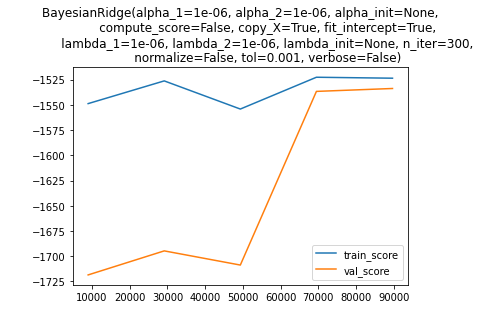

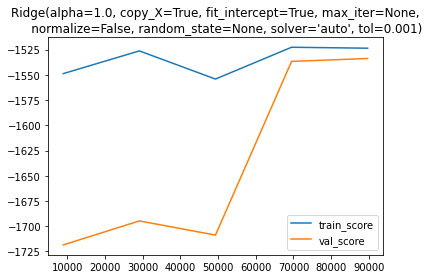

<Figure size 432x288 with 0 Axes>

In [159]:
for i in algo_ml.values():
  print(i)
  print(i.score(xtrain,ytrain))
  y=i.predict(test)
  print(y)
  gamma,train_score,val_score=learning_curve(i,xtrain,ytrain,cv=5,scoring="neg_root_mean_squared_error")
  
  plt.plot(gamma,train_score.mean(axis=1),label="train_score")
  plt.plot(gamma,val_score.mean(axis=1),label="val_score")
  plt.title(i)
  plt.legend()
  plt.figure()
  print("Courbe d'apprentissage de ", i)

In [160]:
#sklearn.metrics.SCORERS.keys()

In [171]:
# Le LinearSVR a le meilleur score 0.8439218873024286
#
y=algo_ml["LinearSVR"].predict(test)
yfinal=[]
for i in y:
  yfinal.append(i)


In [228]:
copy_test=pd.read_csv('/content/drive/MyDrive/test.csv')
copy_test["Sales"]=ypredict



In [229]:
kaggle=pd.DataFrame(copy_test[["Id","Sales"]])

In [230]:
kaggle

,Id,Sales
0,1,7621.194824
1,2,7619.971191
2,3,7617.532715
3,4,7616.917969
4,5,7616.303223
...,...,...
41083,41084,5215.398438
41084,41085,5214.782715
41085,41086,5214.168457
41086,41087,5213.553223


In [234]:
kaggle.to_csv("resultat.csv",index=False)

In [233]:
kaggle

,Id,Sales
0,1,7621.194824
1,2,7619.971191
2,3,7617.532715
3,4,7616.917969
4,5,7616.303223
...,...,...
41083,41084,5215.398438
41084,41085,5214.782715
41085,41086,5214.168457
41086,41087,5213.553223
